
 2 Construcción de trayectoria

 Se ha registrado la posición de un vehículo autónomo que circula en un parque industrial mediante GPS
 en distintos instantes de tiempo (ver archivo mediciones.csv). La posición del vehículo se registra en dos
 dimensiones en coordenadas x1(ti),x2(ti).



*   Utilizando los datos provistos (mediciones.csv) recupere la trayectoria del vehículo interpolando las
 posiciones provistas y compárelas con la trayectoria real (ground truth provisto en groundtruth.csv).
*   Por otro lado, se han realizado 4 mediciones de posición de otro vehículo que se encuentran en el
 archivo mediciones2.csv. Se solicita aproximar la trayectoria de este segundo vehículo y determinar
 con métodos numéricos en que coordenadas el primer vehículo atraviesa la trayectoria del segundo
 vehículo
---
Mediciones1.cvs

0.000000000000000000e+00 3.241313193385525482e-01

8.517645089584206630e+00 1.845643719589526777e+00

1.623720889996237204e+00 2.910251234820271371e+00

1.286924818108026614e+01 3.826099314719869415e+00

1.817616982401723646e+01 4.655536721746078577e+00

1.233339209402911152e+01 5.425660508915483682e+00

2.177622054412167074e+01 5.535129191087542644e+00

2.457602173690377612e+01 5.242338100374049681e+00

2.448679983957896056e+01 4.902672492943741744e+00

3.344102121252131354e+01 4.523027090696261965e+00


In [13]:
import numpy as np
from scipy import interpolate
import matplotlib . pyplot as plt

In [14]:
# Data provided
data = [
    [0.000000000000000000e+00, 3.241313193385525482e-01],
    [8.517645089584206630e+00, 1.845643719589526777e+00],
    [1.623720889996237204e+00, 2.910251234820271371e+00],
    [1.286924818108026614e+01, 3.826099314719869415e+00],
    [1.817616982401723646e+01, 4.655536721746078577e+00],
    [1.233339209402911152e+01, 5.425660508915483682e+00],
    [2.177622054412167074e+01, 5.535129191087542644e+00],
    [2.457602173690377612e+01, 5.242338100374049681e+00],
    [2.448679983957896056e+01, 4.902672492943741744e+00],
    [3.344102121252131354e+01, 4.523027090696261965e+00]
]

# Convert data into numpy arrays
data_array = np.array(data)
x_1_values = data_array[:, 0]  # Extracting time values
x_2_values = data_array[:, 1]  # Extracting x values
time_values = np.array(range(0,10))

print("X_1 Time values:")
print(x_1_values,'\n' )

print("X_2 values:")
print(x_2_values)

X_1 Time values:
[ 0.          8.51764509  1.62372089 12.86924818 18.17616982 12.33339209
 21.77622054 24.57602174 24.48679984 33.44102121] 

X_2 values:
[0.32413132 1.84564372 2.91025123 3.82609931 4.65553672 5.42566051
 5.53512919 5.2423381  4.90267249 4.52302709]


In [15]:
#Creando las funciones con la librería scipy
inter_x_1 = interpolate.interp1d(time_values, x_1_values, 'cubic')
inter_x_2 = interpolate.interp1d(time_values, x_2_values, 'cubic')
#inter_x_1_dt = interpolate.interp1d(time_values, x_2_values, 'cubic')


#Declarando dominio e imagen con numpy
ts = np.linspace(min(time_values), max(time_values), 100)
x_1s = inter_x_1(ts)
x_2s = inter_x_2(ts)

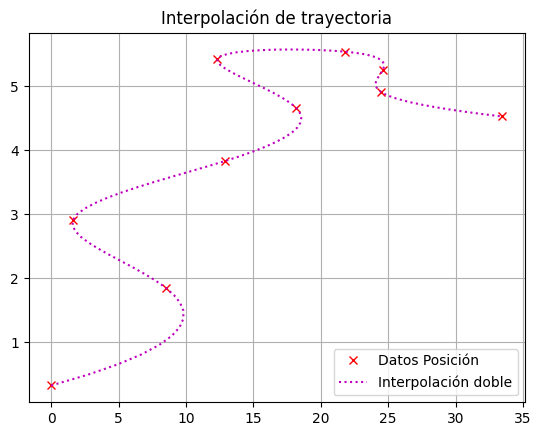

In [16]:
#Ploteando el gráfico
plt.plot(x_1_values, x_2_values, 'rx', label='Datos Posición')
plt.plot(x_1s, x_2s, 'm:', label='Interpolación doble')

plt.title('Interpolación de trayectoria')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#derivadas

new_spline=interpolate.CubicSpline(time_values, x_1_values)

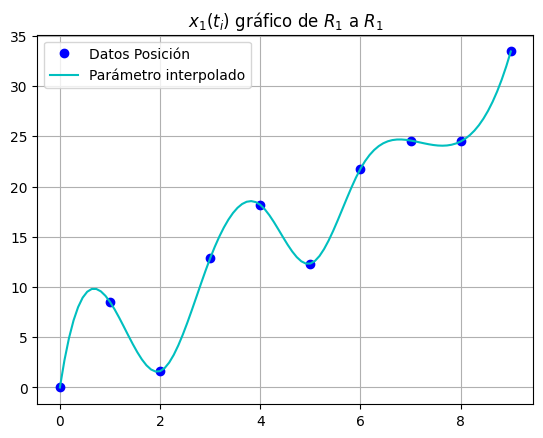

In [34]:
#Ploteando el subfunctions
plt.plot(time_values, x_1_values, 'bo', label='Datos Posición')
plt.plot(ts, x_1s, 'c-', label='Parámetro interpolado')
#plt.plot(ts, new_spline(ts), color='cyan', linestyle='-', label='otra forma')
#plt.plot(ts, new_spline(ts, 1), color='pink', linestyle='-', label='primera derivada')

plt.title('$x_1(t_i)$ gráfico de $R_1 $ a $ R_1$')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# cargando data
all_truth = np.loadtxt('pvd_data/mnyo_ground_truth.csv', delimiter=',')
truth_of_x_1=[m[0] for m in all_truth]
truth_of_x_2=[m[1] for m in all_truth]

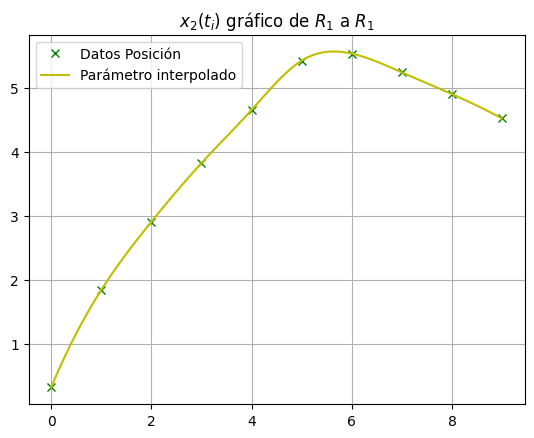

In [37]:
#Ploteando las subfunciones
plt.plot(time_values, x_2_values, 'gx', label='Datos Posición')
plt.plot(ts, x_2s, 'y-', label='Parámetro interpolado')
plt.title('$x_2(t_i)$ gráfico de $R_1 $ a $ R_1$')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
delta_x_1=truth_of_x_1-x_1s
delta_x_2=truth_of_x_2-x_2s
delta_modules=np.sqrt(pow(delta_x_2,2)+pow(delta_x_1,2))

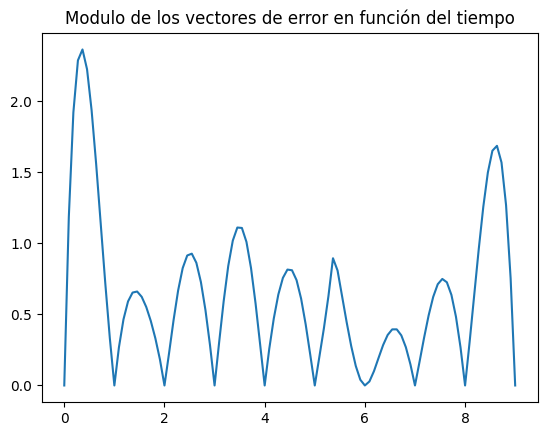

In [38]:
plt.plot(ts, delta_modules)
plt.title('Modulo de los vectores de error en función del tiempo')
plt.show()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
redish=max(delta_modules)
colors = [(0, 'green'), (0.5, 'yellow'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list('custom_colormap', colors)

In [21]:
colors = np.sqrt(pow(delta_x_2,2)+pow(delta_x_1,2))

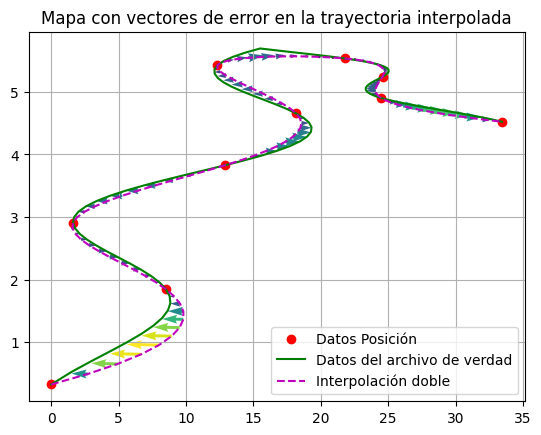

In [27]:
#Ploteando el gráfico
plt.plot(x_1_values, x_2_values, 'ro', label='Datos Posición')
plt.plot(truth_of_x_1, truth_of_x_2, 'g-', label='Datos del archivo de verdad')
plt.quiver(x_1s, x_2s, delta_x_1, delta_x_2, colors, scale_units='xy', scale=1)
plt.plot(x_1s, x_2s, 'm--', label='Interpolación doble')

plt.title('Mapa con vectores de error en la trayectoria interpolada')
plt.legend()
plt.grid(True)
plt.show()